# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we use transfer learning to train a CNN to classify dog breeds.

### 1. Load Dog Dataset

Before running the code cell below, download the dataset of dog images [here](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip) and place it in the respository.

In [68]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('dogImages/train')
valid_files, valid_targets = load_dataset('dogImages/valid')
test_files, test_targets = load_dataset('dogImages/test')

# load ordered list of dog names
dog_names = [item[20:-1] for item in glob('dogImages/train/*/')]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % str(len(train_files) + len(valid_files) + len(test_files)))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

There are 133 total dog categories.
There are 7520 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 5 test dog images.


In [69]:
for i in range(len(test_targets)):
    test_targets[i] = np.zeros(133)
    test_targets[i][33] = 1


### 2. Visualize the First 12 Training Images

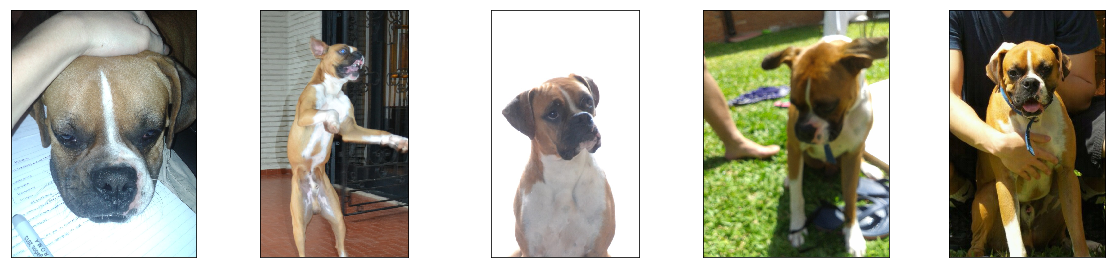

In [70]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_img(img_path, ax):
    img = cv2.imread(img_path)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
fig = plt.figure(figsize=(20, 10))
for i in range(5):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    visualize_img(test_files[i], ax)

### 3. Obtain the VGG-16 Bottleneck Features

Before running the code cell below, download the file linked [here](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG16Data.npz) and place it in the `bottleneck_features/` folder.

In [65]:
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_vgg16 = bottleneck_features['train']
valid_vgg16 = bottleneck_features['valid']
prueba_features = np.load('outfile_puka.npz')
test_vgg16 = prueba_features['pr']

### 4. Define a Model Architecture (Model 1)

In [8]:
from keras.layers import Dense, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Flatten(input_shape=(7, 7, 512)))
model.add(Dense(133, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 133)               3336837   
Total params: 3,336,837
Trainable params: 3,336,837
Non-trainable params: 0
_________________________________________________________________


### 5. Define another Model Architecture (Model 2)

In [58]:
from keras.layers import GlobalAveragePooling2D,Dropout,Dense
from keras.models import Sequential

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(7, 7, 512)))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(133, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 133)               34181     
Total params: 428,165
Trainable params: 428,165
Non-trainable params: 0
_________________________________________________________________


### 6. Compile the Model (Model 2)

In [59]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', 
                  metrics=['accuracy'])

### 7. Train the Model (Model 2)

In [12]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='dogvgg16.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit(train_vgg16, train_targets, epochs=60, validation_data=(valid_vgg16, valid_targets), 
          callbacks=[checkpointer], verbose=1, shuffle=True)

Train on 6680 samples, validate on 835 samples
Epoch 1/60
6680/6680 [==============================] - 2s - loss: 5.0688 - acc: 0.0208 - val_loss: 4.4383 - val_acc: 0.1509
Epoch 2/60
6680/6680 [==============================] - 1s - loss: 4.3867 - acc: 0.0765 - val_loss: 3.7082 - val_acc: 0.2898
Epoch 3/60
6680/6680 [==============================] - 2s - loss: 3.7207 - acc: 0.1702 - val_loss: 2.8527 - val_acc: 0.4084
Epoch 4/60
6680/6680 [==============================] - 2s - loss: 3.0845 - acc: 0.2612 - val_loss: 2.2015 - val_acc: 0.5329
Epoch 5/60
6680/6680 [==============================] - 2s - loss: 2.5622 - acc: 0.3431 - val_loss: 1.7563 - val_acc: 0.5880
Epoch 6/60
6680/6680 [==============================] - 2s - loss: 2.2078 - acc: 0.4004 - val_loss: 1.4630 - val_acc: 0.6335
Epoch 7/60
6680/6680 [==============================] - 2s - loss: 1.9421 - acc: 0.4630 - val_loss: 1.2674 - val_acc: 0.6910
Epoch 8/60
6680/6680 [==============================] - 2s - loss: 1.7179 - ac

### 8. Load the Model with the Best Validation Accuracy (Model 2)

In [60]:
# load the weights that yielded the best validation accuracy
model.load_weights('dogvgg16.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set (Model 2)

In [67]:
# get index of predicted dog breed for each image in test set

vgg16_predictions = [model.predict(np.expand_dims(feature, axis=0)) for feature in test_vgg16]
for i in range(len(test_targets)):
    print('imagen ',(i+1))
    xx = model.predict(np.expand_dims(test_vgg16[i], axis=0))        
    yy = np.array(xx,copy=True)
    yy.sort()
    yy= np.flip(yy,1)
    for j in range(6):
        print(dog_names[np.where(xx[0] == yy[0][j])[0][0]])
    print('\n\n')

for i in range(len(vgg16_predictions)):
    vgg16_predictions[i] = np.argmax(vgg16_predictions[i])

    
# report test accuracy
test_accuracy = 100*np.sum(np.array(vgg16_predictions)==
                           np.argmax(test_targets, axis=1))/len(vgg16_predictions)

print('\nTest accuracy: %.4f%%' % test_accuracy)

imagen  1
Chihuahua
Xoloitzcuintli
Chinese_crested



imagen  2
Chihuahua
Manchester_terrier
Xoloitzcuintli



imagen  3
Dachshund
German_pinscher
Manchester_terrier



imagen  4


IndexError: index 3 is out of bounds for axis 0 with size 3

In [62]:
# get predictions on the test set
y_hat = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) 
                     for feature in test_vgg16]
y_hat = np.array(y_hat)
labels = dog_names


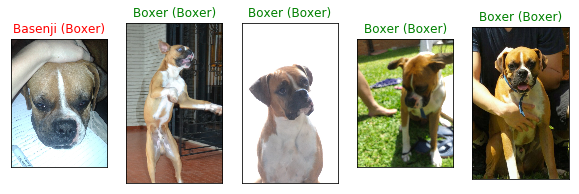

In [64]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(10, 100))
for i, idx in enumerate(np.random.choice(test_files.shape[0], size=5, replace=False)):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    visualize_img(test_files[idx],ax)
    pred_idx = y_hat[idx]
    true_idx = np.argmax(test_targets[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))